# Sales Analysis

## Import Libraries

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
from itertools import combinations

## Task 1 - Merge All 12 months worth of sales data into a single dataset

In [116]:
monthly_datasets = []
total_entries = 0

# Read all monthly datasets
for name in [name for name in os.listdir('./Sales_Data')]:
    dataset = pd.read_csv('Sales_Data/' + name)
    monthly_datasets.append(dataset)
    total_entries += dataset.size
    print('Dataset \'{0}\' loaded with {1} entries'.format(name, dataset.size))
    
# Combine them all
sales_data = pd.concat(monthly_datasets)

# Check if everything is loaded
if total_entries == sales_data.size:
    print('\nDatasets merged successfully ({0} rows total).'.format(total_entries))
else:
    print('\nWarning, number of entries don\'t match')

Dataset 'Sales_April_2019.csv' loaded with 110298 entries
Dataset 'Sales_August_2019.csv' loaded with 72066 entries
Dataset 'Sales_December_2019.csv' loaded with 150702 entries
Dataset 'Sales_February_2019.csv' loaded with 72216 entries
Dataset 'Sales_January_2019.csv' loaded with 58338 entries
Dataset 'Sales_July_2019.csv' loaded with 86226 entries
Dataset 'Sales_June_2019.csv' loaded with 81732 entries
Dataset 'Sales_March_2019.csv' loaded with 91356 entries
Dataset 'Sales_May_2019.csv' loaded with 99810 entries
Dataset 'Sales_November_2019.csv' loaded with 105966 entries
Dataset 'Sales_October_2019.csv' loaded with 122274 entries
Dataset 'Sales_September_2019.csv' loaded with 70116 entries

Datasets merged successfully (1121100 rows total).


In [117]:
# Save for future use
sales_data.to_csv('Output/Sales_Data.csv', index = False)
sales_data = pd.read_csv('Output/Sales_Data.csv')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Task 2 - Data Prep (Cleanup)

In [118]:
# Drop NaN rows for 'Order Date' column
sales_data.dropna(how = 'all', inplace = True)

In [119]:
# Get rid of weird looking rows
sales_data = sales_data.loc[sales_data['Order Date'] != 'Order Date']

In [245]:
# Convert data types
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])   # Make int
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])   # Make float
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])   # Make DateTime

In [200]:
# Remove the 'City' and 'State' columns as they are not useful anymore
sales_data.drop(columns = ['City', 'State'], inplace = True)

## Task 3 - Feature Extraction

### Add Month Column

In [255]:
sales_data['Order Month'] = sales_data['Order Date'].dt.month
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City/State,Order Month,Order Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.900000,Dallas (TX),4,8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.989998,Boston (MA),4,22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.000000,Los Angeles (CA),4,14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.990000,Los Angeles (CA),4,14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.990000,Los Angeles (CA),4,9


### Add City Column

In [187]:
sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles


In [190]:
# There is a problem with getting the cities as therer might exist duplicate cities
sales_data['State'] = sales_data['Purchase Address'].apply(lambda x: x.split(',')[-1].strip().split(' ')[0])
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston,MA
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles,CA
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles,CA
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles,CA


In [194]:
# Now combine 'City' and 'State' columns
sales_data['City/State'] = sales_data['City'] + ' (' + sales_data['State'] + ')'
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City/State
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas,TX,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston,MA,Boston (MA)
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles,CA,Los Angeles (CA)
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles,CA,Los Angeles (CA)
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles,CA,Los Angeles (CA)


### Calculate the total sales for each order

In [218]:
sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City/State,Order Month,Order Hour
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.900000,Dallas (TX),4,08
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.989998,Boston (MA),4,22
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.000000,Los Angeles (CA),4,14
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.990000,Los Angeles (CA),4,14
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.990000,Los Angeles (CA),4,09


### Add 'Order Hour' & 'Order Minute' Column

In [265]:
sales_data['Order Hour'] = sales_data['Order Date'].dt.hour
sales_data['Order Minute'] = sales_data['Order Date'].dt.minute
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City/State,Order Month,Order Hour,Order Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.900000,Dallas (TX),4,8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.989998,Boston (MA),4,22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.000000,Los Angeles (CA),4,14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.990000,Los Angeles (CA),4,14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.990000,Los Angeles (CA),4,9,27


## Task 4 - What was the best month for sales? How much was earned that month?

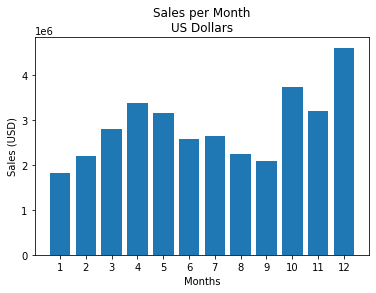

,Order Month,Sales
0,1,1.822257e+06
1,2,2.202022e+06
2,3,2.807100e+06
3,4,3.390670e+06
4,5,3.152607e+06
5,6,2.577802e+06
6,7,2.647776e+06
7,8,2.244468e+06
8,9,2.097560e+06
9,10,3.736727e+06


In [261]:
month_results = sales_data[['Order Month', 'Sales']].groupby(['Order Month'], as_index = False).sum().sort_values(by = 'Order Month', ascending = True)

months = range(1, 13)

plt.title('Sales per Month\nUS Dollars')
plt.xlabel('Months')
plt.ylabel('Sales (USD)')
plt.xticks(months)

plt.bar(months, month_results['Sales'])

plt.show()
month_results

# Answer:
# December was the best month for sales with 4.6$ Million
# January was the worst month for sales with 1.8$ Million

## Task 5 - Which City had the highest number of sales?

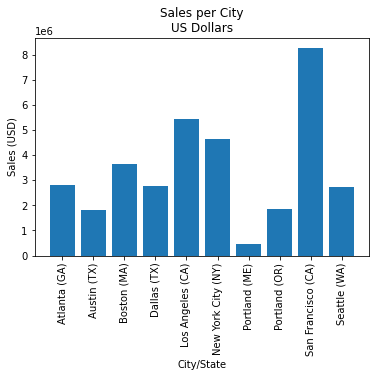

,City/State,Sales
0,Atlanta (GA),2.795499e+06
1,Austin (TX),1.819582e+06
2,Boston (MA),3.661642e+06
3,Dallas (TX),2.767975e+06
4,Los Angeles (CA),5.452571e+06
5,New York City (NY),4.664317e+06
6,Portland (ME),4.497583e+05
7,Portland (OR),1.870732e+06
8,San Francisco (CA),8.262204e+06
9,Seattle (WA),2.747755e+06


In [262]:
city_results = sales_data[['City/State', 'Sales']].groupby('City/State', as_index = False).sum()

plt.title('Sales per City\nUS Dollars')
plt.xlabel('City/State')
plt.ylabel('Sales (USD)')
plt.xticks(rotation = 90)

plt.bar(city_results['City/State'], city_results['Sales'])

plt.show()
city_results

# Answer:
# San Francisco was the best city for sales with 8.2$ Million
# Asutin was the worst city for sales with 1.8$ Million

## Task 6 - What time should we display advertisements to maximize the liklyhood of customer's buying the product?

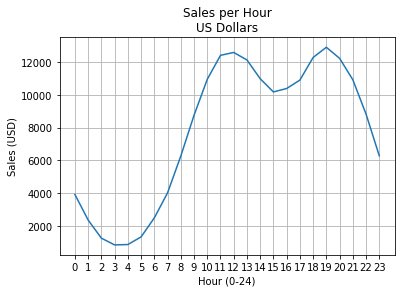

In [287]:
hourly_results = sales_data[['Sales', 'Order Hour']].groupby('Order Hour', as_index = False).count()
hours = [hour for hour, df in sales_data.groupby('Order Hour')]

plt.title('Sales per Hour\nUS Dollars')
plt.xlabel('Hour (0-24)')
plt.ylabel('Sales (USD)')
plt.xticks(hours)
plt.grid()

plt.plot(hours, hourly_results['Sales'])
plt.show()

# Answer:
# Advertisements must be shown hours of 11-13AM and 18-20PM as they have the highest number of orders

## Task 7 - What products are most often sold together

In [294]:
duplicated_sales = sales_data[sales_data['Order ID'].duplicated(keep = False)]

# Group the orders with the same 'Order ID'
duplicated_sales['Grouped'] = duplicated_sales.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Remove dupliacte entries
duplicated_sales = duplicated_sales[['Order ID', 'Grouped']].drop_duplicates()

duplicated_sales.head(10)

<ipython-input-294-d2c0e8d0985c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_sales['Grouped'] = duplicated_sales.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [303]:
count = Counter()

for row in duplicated_sales['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)

# Answer:
# 'iPhone', 'Lightning Charging Cable' was the most commonly ordered products

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## Task 8 - What product sold the most? Why did it sold the most?

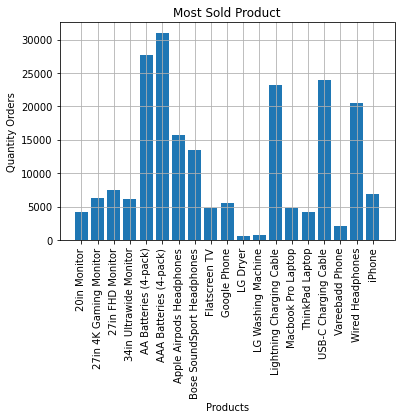

In [328]:
product_groups = sales_data.groupby('Product', as_index = False)
quantity_ordered = product_groups.sum()['Quantity Ordered']

products = [product for product, df in product_groups]

plt.title('Most Sold Product')
plt.xlabel('Products')
plt.ylabel('Quantity Orders')

plt.bar(products, quantity_ordered)
plt.xticks(rotation = 90, size = 10)
plt.grid()

plt.show()

<ipython-input-342-cc10a9219e9a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 90)


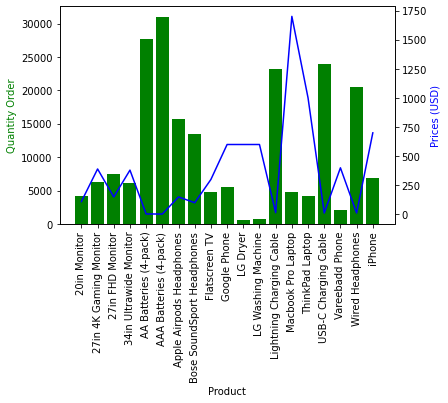

In [342]:
prices = sales_data[['Price Each', 'Product']].groupby('Product').mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Order', color = 'g')
ax2.set_ylabel('Prices (USD)', color = 'b')

ax1.set_xticklabels(products, rotation = 90)

plt.show()